---
title: Dask Intro
subtitle: Explore how to connect to the dask gateway, spin up and scale a cluster and submit a simple workload.
authors:
  - name: Gerald Walter Irsiegler
    github: geraldir
    affiliations:
      - id: EODC
        institution: EODC
date: 2025-05-28
thumbnail: ../static/ESA_EOPF_logo_2025_COLOR_ESA_blue_reduced.png
keywords: ["dask"]
tags: ["dask"]
releaseDate: 2025-07-22
datePublished: 2025-07-22
dateModified: 2025-07-22
github: https://github.com/EOPF-Sample-Service/eopf-sample-notebooks
license: Apache-2.0
---

```{image} ../static/ESA_EOPF_logo_2025_COLOR_ESA_blue_reduced.png
:alt: ESA EOPF Zarr Logo
:width: 250px
:align: center
```

# Sentinel-1 GRD Zarr Product Exploration

## Table of Contents
1. [Introduction](#IntroductionGRD)
1. [Import modules](#ImportModulesGRD)
2. [File path definition](#PathGRD)
3. [Open the product](#OpenGRD)
4. [Overview of the product content](#OverviewGRD)
5. [Explore product geolocation](#LocationGRD)
6. [Data Decimation](#DecimationGRD)  
7. [Geocoding using GCPs](#GeocodingGRD)  
8. [Geographic selection](#SelectionGRD)
9. [Summary](#SummaryGRD)

(IntroductionGRD)=
## Introduction

This notebook demonstrates how to open, explore, and visualize Sentinel-1 GRD products stored in EOPF Zarr format, including accessing, geocoding, subsetting and plotting a single polarization.

:::{hint} Overview
**Questions**
- How do I access Sentinel-1 GRD in EOPF Zarr format?
- How do I plot the Sentinel-1 footprint location on a map?
- How do I plot an image of the selected scene?

**Objectives**
- Being able to open a Sentinel-1 GRD EOPF Zarr product from an object storage
- Understanding the product structure and how to get a specific polarization
- Being able to geocode and slice the data geographically
:::

(ImportModulesGRD)=
## Import Modules

In [1]:
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs

xr.set_options(display_expand_attrs=False)
plt.rcParams["figure.figsize"] = (10, 5)
plt.rcParams["font.size"] = 10

(PathGRD)=
## File path definition

**GRD**: S1A_IW_GRDH_1SDV_20170508T164830_20170508T164855_016493_01B54C_8604

**polarization**: VH

In [ ]:
product = "S1A_IW_GRDH_1SDV_20170508T164830_20170508T164855_016493_01B54C_8604"
remote_product_path = f"https://objectstore.eodc.eu:2222/e05ab01a9d56408d82ac32d69a5aae2a:sample-data/tutorial_data/cpm_b716/{product}.zarr"

(OpenGRD)=
## Open the product

The GRD product can be opened as a `DataTree` using Xarray:

In [23]:
dt = xr.open_datatree(remote_product_path, engine="zarr", chunks={})
dt

<xarray.DataTree>
Group: /
│   Attributes: (2)
├── Group: /S01SIWGRD_20170508T164830_0025_A094_8604_01B54C_VH
│   │   Attributes: (2)
│   ├── Group: /S01SIWGRD_20170508T164830_0025_A094_8604_01B54C_VH/conditions
│   │   ├── Group: /S01SIWGRD_20170508T164830_0025_A094_8604_01B54C_VH/conditions/antenna_pattern
│   │   │       Dimensions:           (azimuth_time: 27, slant_range_time: 707)
│   │   │       Coordinates:
│   │   │         * azimuth_time      (azimuth_time) datetime64[ns] 216B 2017-05-08T16:48:30....
│   │   │           slant_range_time  (azimuth_time, slant_range_time) float64 153kB dask.array<chunksize=(27, 707), meta=np.ndarray>
│   │   │       Data variables:
│   │   │           elevation_angle   (azimuth_time, slant_range_time) float32 76kB dask.array<chunksize=(27, 707), meta=np.ndarray>
│   │   │           incidence_angle   (azimuth_time, slant_range_time) float32 76kB dask.array<chunksize=(27, 707), meta=np.ndarray>
│   │   │           roll              (azimuth_time) float64 216B dask.array<chunksize=(27,), meta=np.ndarray>
│   │   │           terrain_height    (azimuth_time) float64 216B dask.array<chunksize=(27,), meta=np.ndarray>
│   │   ├── Group: /S01SIWGRD_20170508T164830_0025_A094_8604_01B54C_VH/conditions/attitude
│   │   │       Dimensions:       (azimuth_time: 25)
│   │   │       Coordinates:
│   │   │         * azimuth_time  (azimuth_time) datetime64[ns] 200B 2017-05-08T16:48:30.7500...
│   │   │       Data variables:
│   │   │           pitch         (azimuth_time) float64 200B dask.array<chunksize=(25,), meta=np.ndarray>
│   │   │           q0            (azimuth_time) float32 100B dask.array<chunksize=(25,), meta=np.ndarray>
│   │   │           q1            (azimuth_time) float32 100B dask.array<chunksize=(25,), meta=np.ndarray>
│   │   │           q2            (azimuth_time) float32 100B dask.array<chunksize=(25,), meta=np.ndarray>
│   │   │           q3            (azimuth_time) float32 100B dask.array<chunksize=(25,), meta=np.ndarray>
│   │   │           roll          (azimuth_time) float64 200B dask.array<chunksize=(25,), meta=np.ndarray>
│   │   │           wx            (azimuth_time) float64 200B dask.array<chunksize=(25,), meta=np.ndarray>
│   │   │           wy            (azimuth_time) float64 200B dask.array<chunksize=(25,), meta=np.ndarray>
│   │   │           wz            (azimuth_time) float64 200B dask.array<chunksize=(25,), meta=np.ndarray>
│   │   │           yaw           (azimuth_time) float64 200B dask.array<chunksize=(25,), meta=np.ndarray>
│   │   ├── Group: /S01SIWGRD_20170508T164830_0025_A094_8604_01B54C_VH/conditions/azimuth_fm_rate
│   │   │       Dimensions:                     (azimuth_time: 10, degree: 3)
│   │   │       Coordinates:
│   │   │         * azimuth_time                (azimuth_time) datetime64[ns] 80B 2017-05-08T...
│   │   │       Dimensions without coordinates: degree
│   │   │       Data variables:
│   │   │           azimuth_fm_rate_polynomial  (azimuth_time, degree) float64 240B dask.array<chunksize=(10, 3), meta=np.ndarray>
│   │   │           t0                          (azimuth_time) float64 80B dask.array<chunksize=(10,), meta=np.ndarray>
│   │   ├── Group: /S01SIWGRD_20170508T164830_0025_A094_8604_01B54C_VH/conditions/coordinate_conversion
│   │   │       Dimensions:            (azimuth_time: 28, degree: 9)
│   │   │       Coordinates:
│   │   │         * azimuth_time       (azimuth_time) datetime64[ns] 224B 2017-05-08T16:48:28...
│   │   │       Dimensions without coordinates: degree
│   │   │       Data variables:
│   │   │           gr0                (azimuth_time) float64 224B dask.array<chunksize=(28,), meta=np.ndarray>
│   │   │           grsr_coefficients  (azimuth_time, degree) float64 2kB dask.array<chunksize=(28, 9), meta=np.ndarray>
│   │   │           slant_range_time   (azimuth_time) float64 224B dask.array<chunksize=(28,), meta=np.ndarray>
│   │   │           sr0                (azimuth_time) float64 224B dask.array<chunksize

(OverviewGRD)=
## Overview of the product content

The Zarr GRD product contains one group for each polarization:

In [26]:
dt.groups[1]

'/S01SIWGRD_20170508T164830_0025_A094_8604_01B54C_VH'

Each polarization group contains the `conditions`, `measurements` and `quality` groups. We can list all the groups for the VH polarization calling `.groups`

In [32]:
dt[dt.groups[1]].groups

('/S01SIWGRD_20170508T164830_0025_A094_8604_01B54C_VH',
 '/S01SIWGRD_20170508T164830_0025_A094_8604_01B54C_VH/conditions',
 '/S01SIWGRD_20170508T164830_0025_A094_8604_01B54C_VH/measurements',
 '/S01SIWGRD_20170508T164830_0025_A094_8604_01B54C_VH/quality',
 '/S01SIWGRD_20170508T164830_0025_A094_8604_01B54C_VH/conditions/antenna_pattern',
 '/S01SIWGRD_20170508T164830_0025_A094_8604_01B54C_VH/conditions/attitude',
 '/S01SIWGRD_20170508T164830_0025_A094_8604_01B54C_VH/conditions/azimuth_fm_rate',
 '/S01SIWGRD_20170508T164830_0025_A094_8604_01B54C_VH/conditions/coordinate_conversion',
 '/S01SIWGRD_20170508T164830_0025_A094_8604_01B54C_VH/conditions/doppler_centroid',
 '/S01SIWGRD_20170508T164830_0025_A094_8604_01B54C_VH/conditions/gcp',
 '/S01SIWGRD_20170508T164830_0025_A094_8604_01B54C_VH/conditions/orbit',
 '/S01SIWGRD_20170508T164830_0025_A094_8604_01B54C_VH/conditions/reference_replica',
 '/S01SIWGRD_20170508T164830_0025_A094_8604_01B54C_VH/conditions/replica',
 '/S01SIWGRD_20170508T164

Access now the VH polarization group and the GRD DataArray

In [33]:
grd = dt[dt.groups[1]]["measurements/grd"]
grd

<xarray.DataArray 'grd' (azimuth_time: 16694, ground_range: 26239)> Size: 876MB
dask.array<open_dataset-grd, shape=(16694, 26239), dtype=uint16, chunksize=(2557, 26239), chunktype=numpy.ndarray>
Coordinates:
  * azimuth_time  (azimuth_time) datetime64[ns] 134kB 2017-05-08T16:48:30.467...
  * ground_range  (ground_range) float64 210kB 0.0 10.0 ... 2.624e+05 2.624e+05
    line          (azimuth_time) int64 134kB dask.array<chunksize=(16694,), meta=np.ndarray>
    pixel         (ground_range) int64 210kB dask.array<chunksize=(26239,), meta=np.ndarray>
Attributes: (3)

(LocationGRD)=
## Explore product geolocation

The Zarr product metadata contains information about the product geolocation we can explore in various ways. For instance, we can show the product footprint on an interactive map.

In [39]:
import geopandas as gpd

# Create a GeoDataFrame from the feature
gdf = gpd.GeoDataFrame.from_features(
    [
        {
            "type": "Feature",
            "geometry": dt.attrs["stac_discovery"][
                "geometry"
            ],  # Use the actual geometry, not the bbox
            "properties": dt.attrs["stac_discovery"][
                "properties"
            ],  # Include all properties
        }
    ],
    crs="EPSG:4326",  # Set the CRS explicitly (adjust EPSG code if needed)
)
gdf.explore()

(DecimationGRD)=
### Data Decimation


We compose a new object, applying decimation to reduce the data we consider for visualization, speeding up the process. Moreover, the original resolution wouldn't fit on most screens. Decimation is performed using the `.isel` xarray method. Here we take one pixel every 10 available in the original dataset:
```python
.isel(x=slice(None, None, 10), y=slice(None, None, 10))
```

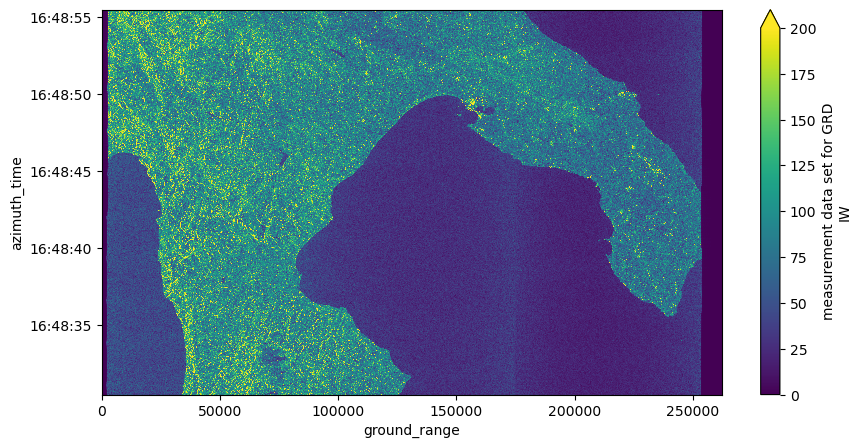

In [7]:
# Decimation data
## decimation
grd_decimated = grd.isel(
    azimuth_time=slice(None, None, 10), ground_range=slice(None, None, 10)
)

## plot
grd_decimated.plot(vmax=200)
plt.show()

(GeocodingGRD)=
## Data Geocoding using GCPs

The data we just visualized is in `azimuth_time` and `ground_range` coordinates. However, if we would like to create a map or compare this data with other data sources, we need to perform a _geocoding_ (also known as _geo-referencing_) operation: the data will be interpolated given the reference Ground Control Points (GCPs). GCPs are defined as points on the surface of the Earth of known location used to interpolate and assig new geographic coordinates to the data.  
If you want to know more about Sentinel-1 Geocoding, please refer to this geocoding guide specific for GRD data: https://asf.alaska.edu/wp-content/uploads/2019/02/GeocodingSentinelData_GDAL_v7.1_.pdf 

**Please not that this geocoding process does not involve terrain correction.** To match the imagery to actual features on the earth and correct for distortions caused by the side-looking geometry of SAR data, you must perform other steps including terrain correction.

We firstly need to access the GCPs data:

In [8]:
gcp = dt[dt.groups[1]]["conditions/gcp"].to_dataset()
gcp

<xarray.Dataset> Size: 12kB
Dimensions:               (azimuth_time: 10, ground_range: 21)
Coordinates:
  * azimuth_time          (azimuth_time) datetime64[ns] 80B 2017-05-08T16:48:...
  * ground_range          (ground_range) float64 168B 0.0 ... 2.624e+05
    line                  (azimuth_time) uint32 40B dask.array<chunksize=(10,), meta=np.ndarray>
    pixel                 (ground_range) uint32 84B dask.array<chunksize=(21,), meta=np.ndarray>
Data variables:
    azimuth_time_gcp      (azimuth_time, ground_range) datetime64[ns] 2kB dask.array<chunksize=(10, 21), meta=np.ndarray>
    elevation_angle       (azimuth_time, ground_range) float64 2kB dask.array<chunksize=(10, 21), meta=np.ndarray>
    height                (azimuth_time, ground_range) float64 2kB dask.array<chunksize=(10, 21), meta=np.ndarray>
    incidence_angle       (azimuth_time, ground_range) float64 2kB dask.array<chunksize=(10, 21), meta=np.ndarray>
    latitude              (azimuth_time, ground_range) float64 2kB dask.array<chunksize=(10, 21), meta=np.ndarray>
    longitude             (azimuth_time, ground_range) float64 2kB dask.array<chunksize=(10, 21), meta=np.ndarray>
    slant_range_time_gcp  (azimuth_time, ground_range) float64 2kB dask.array<chunksize=(10, 21), meta=np.ndarray>

The GCPs information are provided in a coarser resolution and therefore we need to interpolate them to match the GRD DataArray:

In [9]:
gcp_iterpolated = gcp.interp_like(grd_decimated)
gcp_iterpolated

<xarray.Dataset> Size: 210MB
Dimensions:               (azimuth_time: 1670, ground_range: 2624)
Coordinates:
    line                  (azimuth_time) float64 13kB dask.array<chunksize=(1670,), meta=np.ndarray>
    pixel                 (ground_range) float64 21kB dask.array<chunksize=(2624,), meta=np.ndarray>
  * azimuth_time          (azimuth_time) datetime64[ns] 13kB 2017-05-08T16:48...
  * ground_range          (ground_range) float64 21kB 0.0 100.0 ... 2.623e+05
Data variables:
    elevation_angle       (azimuth_time, ground_range) float64 35MB dask.array<chunksize=(1670, 2624), meta=np.ndarray>
    height                (azimuth_time, ground_range) float64 35MB dask.array<chunksize=(1670, 2624), meta=np.ndarray>
    incidence_angle       (azimuth_time, ground_range) float64 35MB dask.array<chunksize=(1670, 2624), meta=np.ndarray>
    latitude              (azimuth_time, ground_range) float64 35MB dask.array<chunksize=(1670, 2624), meta=np.ndarray>
    longitude             (azimuth_time, ground_range) float64 35MB dask.array<chunksize=(1670, 2624), meta=np.ndarray>
    slant_range_time_gcp  (azimuth_time, ground_range) float64 35MB dask.array<chunksize=(1670, 2624), meta=np.ndarray>

Assign the interpolated `latitude` and `longitude` layers to the GRD coordinates:

In [10]:
grd_decimated = grd_decimated.assign_coords(
    {"latitude": gcp_iterpolated.latitude, "longitude": gcp_iterpolated.longitude}
)

Finally visualize the geocoded data:

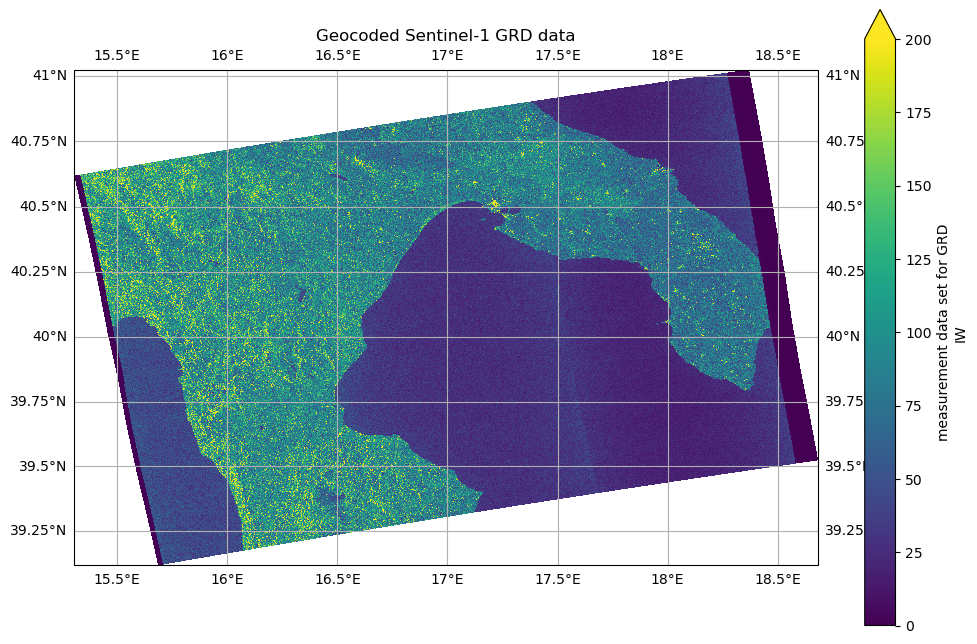

In [11]:
_, ax = plt.subplots(subplot_kw={"projection": ccrs.Miller()}, figsize=(12, 8))
gl = ax.gridlines(
    draw_labels=True, crs=ccrs.PlateCarree(), x_inline=False, y_inline=False
)
grd_decimated.plot(
    ax=ax, transform=ccrs.PlateCarree(), x="longitude", y="latitude", vmax=200
)
ax.set_title("Geocoded Sentinel-1 GRD data")
plt.show()

(SelectionGRD)=
## Geographic Selection

Now that the data is geocoded/georeferenced, it is possible to perform a spatial slicing (or spatial filtering, or cropping) operation, which allows to select only the data falling in our Area Of Interest (AOI):

In [12]:
lat_max = 40.5
lat_min = 40.25
lon_max = 17
lon_min = 16.5

polygon_lon = [lon_min, lon_max, lon_max, lon_min, lon_min]
polygon_lat = [lat_max, lat_max, lat_min, lat_min, lat_max]

Crop the data in space, defining a boolean mask and applying it to the data:

In [20]:
mask = (
    (grd_decimated.latitude < lat_max)
    & (grd_decimated.latitude > lat_min)
    & (grd_decimated.longitude < lon_max)
    & (grd_decimated.longitude > lon_min).load().values
)
grd_crop = grd_decimated.where(mask, drop=True)

Plot the result in geographic coordinates, highlighting the Area Of Interest:

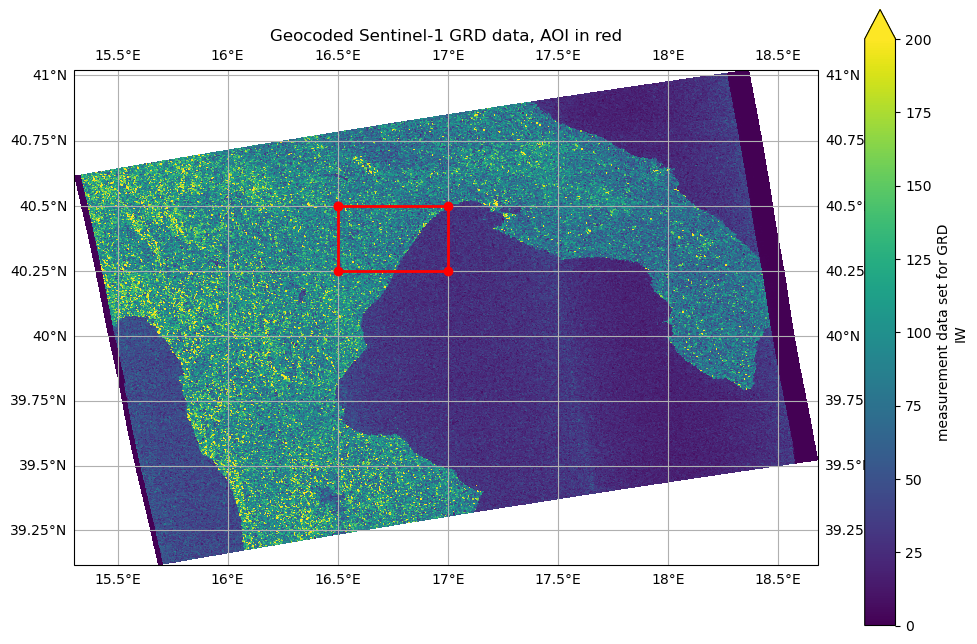

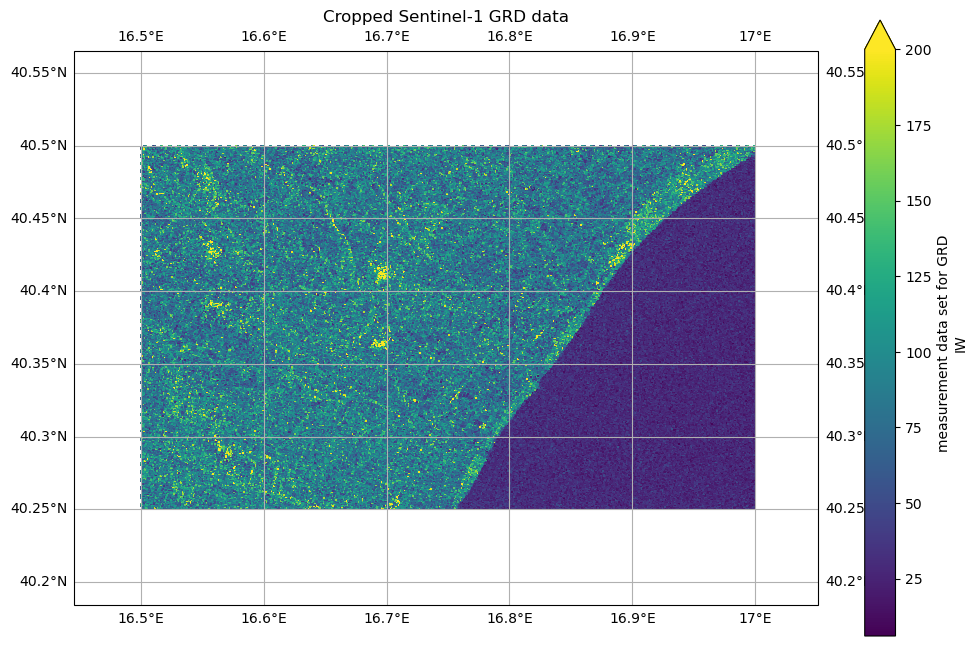

In [21]:
_, ax = plt.subplots(subplot_kw={"projection": ccrs.Miller()}, figsize=(12, 8))
gl = ax.gridlines(
    draw_labels=True, crs=ccrs.PlateCarree(), x_inline=False, y_inline=False
)
grd_decimated[::5, ::5].plot(
    ax=ax,
    transform=ccrs.PlateCarree(),
    x="longitude",
    y="latitude",
    vmax=200,
)
plt.plot(
    polygon_lon,
    polygon_lat,
    color="red",
    linewidth=2,
    marker="o",
    transform=ccrs.PlateCarree(),
)
ax.set_title("Geocoded Sentinel-1 GRD data, AOI in red")

_, ax = plt.subplots(subplot_kw={"projection": ccrs.Miller()}, figsize=(12, 8))
gl = ax.gridlines(
    draw_labels=True, crs=ccrs.PlateCarree(), x_inline=False, y_inline=False
)
grd_crop.plot(
    ax=ax,
    transform=ccrs.PlateCarree(),
    x="longitude",
    y="latitude",
    vmax=200,
)
ax.set_title("Cropped Sentinel-1 GRD data")

plt.show()

(SummaryGRD)=
## Summary

This notebook explored Sentinel-1 GRD data: how to open the Zarr product, select specific groups and perform more advanced operations like geocoding.

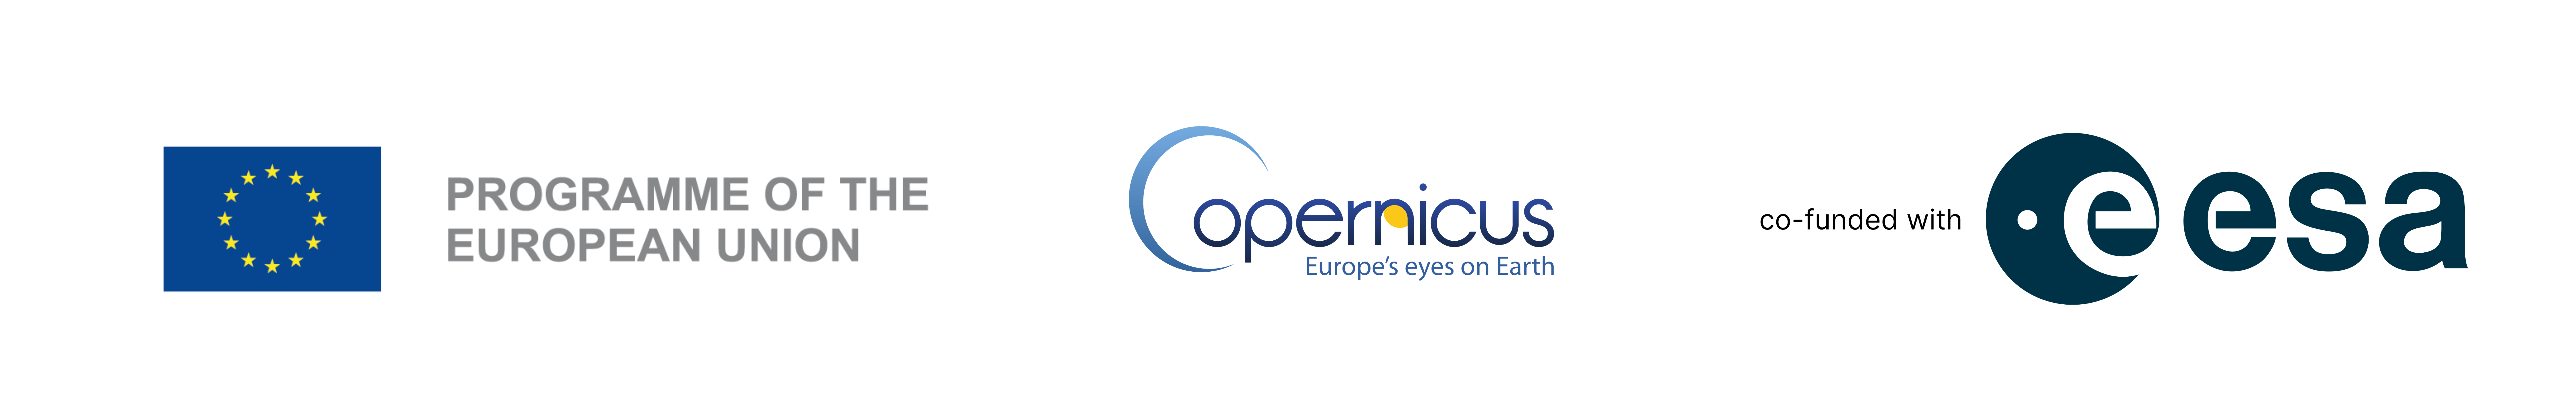